In [1]:
import pickle

In [2]:
import numpy as np

In [3]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)
    

In [4]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [5]:
type(test_data)

list

In [6]:
type(train_data)

list

In [7]:
len(test_data)

1000

In [8]:
len(train_data)

10000

In [9]:
len(test_data[0])

3

In [10]:
' '.join(test_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [11]:
' '.join(test_data[0][1])

'Is John in the kitchen ?'

In [12]:
' '.join(test_data[0][2])

'n o'

In [13]:
test_data[0][2]

'no'

In [14]:
all_data = test_data + train_data

In [15]:
len(all_data)

11000

In [16]:
all_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [17]:
vocab = set()
for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [18]:
vocab.add('no')

In [19]:
vocab.add('yes')

In [20]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [21]:
vocab_len = len(vocab) + 1

In [22]:
vocab_len

38

In [23]:
max_story_len = max([len(data[0]) for data in all_data])

In [24]:
max_question_len = max([len(data[1]) for data in all_data])

In [25]:
max_answer_len = max([len(data[2]) for data in all_data])

In [26]:
max_answer_len

3

In [27]:
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

In [28]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [29]:
tokenizer.word_index

{'back': 1,
 'put': 2,
 'the': 3,
 'left': 4,
 'grabbed': 5,
 'milk': 6,
 'john': 7,
 'went': 8,
 'bedroom': 9,
 'office': 10,
 'hallway': 11,
 'sandra': 12,
 'daniel': 13,
 'in': 14,
 'bathroom': 15,
 'apple': 16,
 'got': 17,
 '?': 18,
 'football': 19,
 'no': 20,
 'dropped': 21,
 'mary': 22,
 'is': 23,
 'kitchen': 24,
 'journeyed': 25,
 'picked': 26,
 '.': 27,
 'there': 28,
 'garden': 29,
 'down': 30,
 'discarded': 31,
 'took': 32,
 'travelled': 33,
 'yes': 34,
 'to': 35,
 'moved': 36,
 'up': 37}

In [30]:
train_story_text = []
train_question_text = []
train_answers = []

In [31]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [32]:
len(train_story_text)

10000

In [33]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [34]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [35]:
train_story_seq

[[22, 36, 35, 3, 15, 27, 12, 25, 35, 3, 9, 27],
 [22,
  36,
  35,
  3,
  15,
  27,
  12,
  25,
  35,
  3,
  9,
  27,
  22,
  8,
  1,
  35,
  3,
  9,
  27,
  13,
  8,
  1,
  35,
  3,
  11,
  27],
 [22,
  36,
  35,
  3,
  15,
  27,
  12,
  25,
  35,
  3,
  9,
  27,
  22,
  8,
  1,
  35,
  3,
  9,
  27,
  13,
  8,
  1,
  35,
  3,
  11,
  27,
  12,
  8,
  35,
  3,
  24,
  27,
  13,
  8,
  1,
  35,
  3,
  15,
  27],
 [22,
  36,
  35,
  3,
  15,
  27,
  12,
  25,
  35,
  3,
  9,
  27,
  22,
  8,
  1,
  35,
  3,
  9,
  27,
  13,
  8,
  1,
  35,
  3,
  11,
  27,
  12,
  8,
  35,
  3,
  24,
  27,
  13,
  8,
  1,
  35,
  3,
  15,
  27,
  13,
  26,
  37,
  3,
  19,
  28,
  27,
  13,
  8,
  35,
  3,
  9,
  27],
 [22,
  36,
  35,
  3,
  15,
  27,
  12,
  25,
  35,
  3,
  9,
  27,
  22,
  8,
  1,
  35,
  3,
  9,
  27,
  13,
  8,
  1,
  35,
  3,
  11,
  27,
  12,
  8,
  35,
  3,
  24,
  27,
  13,
  8,
  1,
  35,
  3,
  15,
  27,
  13,
  26,
  37,
  3,
  19,
  28,
  27,
  13,
  8,
  35,
  3,
  9,
  27

In [36]:
len(train_story_seq)

10000

In [37]:
train_story_seq[0]

[22, 36, 35, 3, 15, 27, 12, 25, 35, 3, 9, 27]

In [38]:
train_story_seq[1]

[22,
 36,
 35,
 3,
 15,
 27,
 12,
 25,
 35,
 3,
 9,
 27,
 22,
 8,
 1,
 35,
 3,
 9,
 27,
 13,
 8,
 1,
 35,
 3,
 11,
 27]

In [39]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
    X = [] #stories
    Xq = [] #questions
    Y = []
    for story,query,answer in data:
        
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

    

In [40]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)

In [41]:
inputs_test,queries_test,answers_test = vectorize_stories(test_data)

In [42]:
inputs_train

array([[ 0,  0,  0, ...,  3,  9, 27],
       [ 0,  0,  0, ...,  3, 11, 27],
       [ 0,  0,  0, ...,  3, 15, 27],
       ...,
       [ 0,  0,  0, ...,  3,  9, 27],
       [ 0,  0,  0, ...,  6, 28, 27],
       [ 0,  0,  0, ..., 16, 28, 27]])

In [43]:
answers_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [44]:
tokenizer.word_index

{'back': 1,
 'put': 2,
 'the': 3,
 'left': 4,
 'grabbed': 5,
 'milk': 6,
 'john': 7,
 'went': 8,
 'bedroom': 9,
 'office': 10,
 'hallway': 11,
 'sandra': 12,
 'daniel': 13,
 'in': 14,
 'bathroom': 15,
 'apple': 16,
 'got': 17,
 '?': 18,
 'football': 19,
 'no': 20,
 'dropped': 21,
 'mary': 22,
 'is': 23,
 'kitchen': 24,
 'journeyed': 25,
 'picked': 26,
 '.': 27,
 'there': 28,
 'garden': 29,
 'down': 30,
 'discarded': 31,
 'took': 32,
 'travelled': 33,
 'yes': 34,
 'to': 35,
 'moved': 36,
 'up': 37}

In [45]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 497.,   0.,   0.,   0.])

In [46]:
sum(answers_train)

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0., 4988.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0., 5012.,    0.,
          0.,    0.])

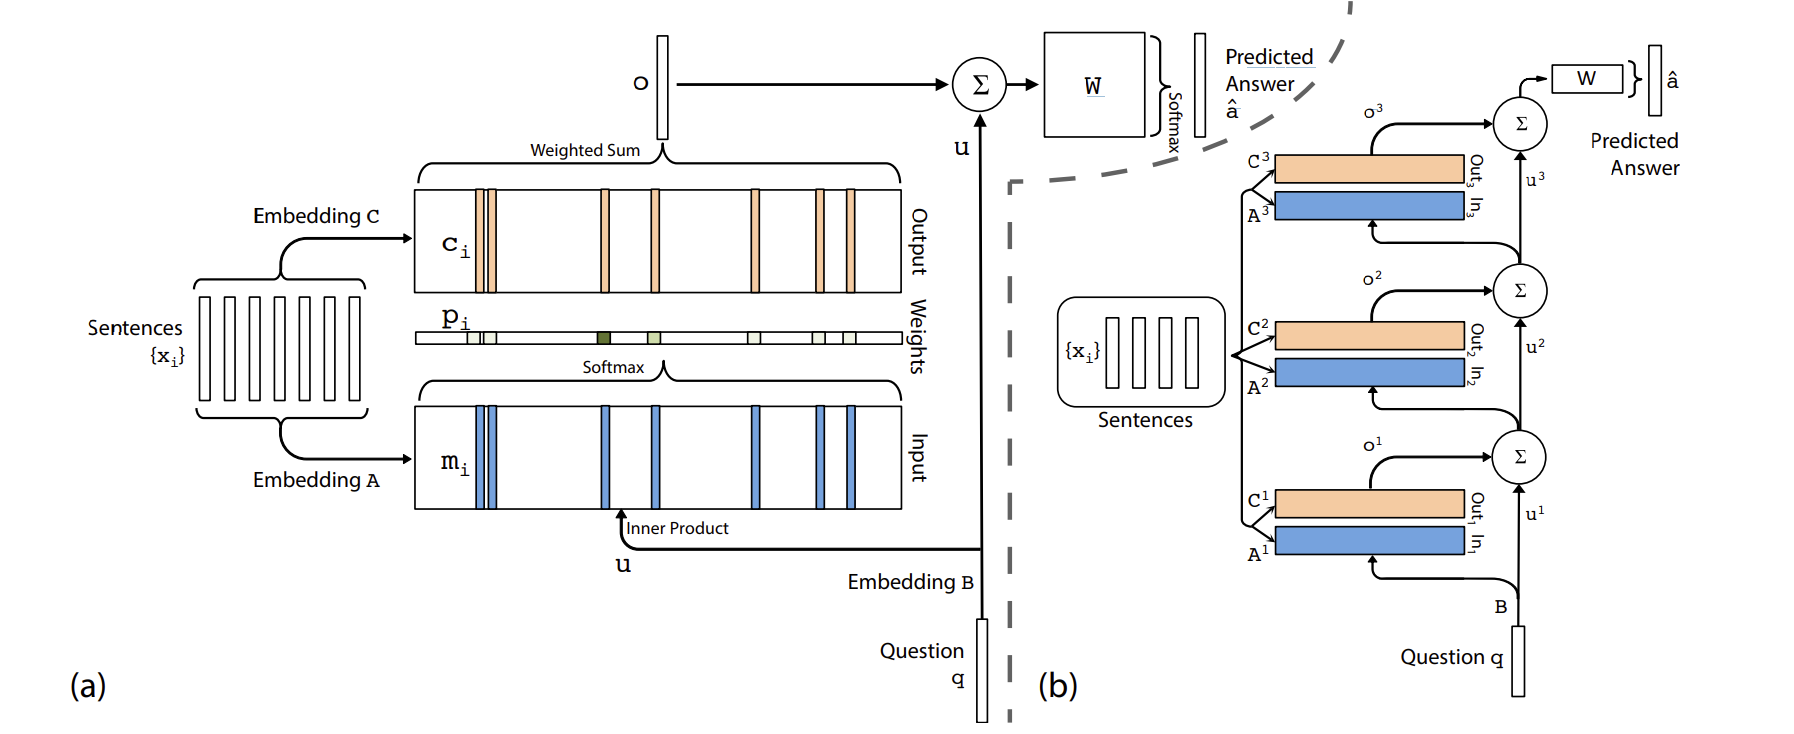

In [47]:
from keras.models import Sequential,Model

In [49]:
from keras.layers import Embedding

In [50]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate

In [51]:
from keras.layers import LSTM

In [52]:
# PLACEHOLDER shape = (max_story_len,batch_size)
input_sequence = Input(shape=(max_story_len,))
question = Input(shape=(max_question_len,))

In [53]:
vocab_size = len(vocab)+1

In [54]:
# Input encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# (samples,story,maxlen,embedding_dim)


In [55]:
# Input encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# (samples,story,maxlen,max_question_len)

In [56]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

#(samples,query_max_len,embedding_dim)

In [57]:
# encoded <-------- encoder(input)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [59]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [60]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [61]:
answer = concatenate([response,question_encoded])

In [62]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [63]:
answer = LSTM(32)(answer)

In [64]:
answer = Dropout(0.5)(answer)

In [65]:
answer = Dense(vocab_size)(answer) # (samples,vocab_size) #yes/no

In [66]:
answer = Activation('softmax')(answer)

In [67]:
model = Model([input_sequence,question],answer)

In [68]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [72]:
history = model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=100,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/100
313/313 [==============================] - 10s 24ms/step - loss: 0.8917 - accuracy: 0.4905 - val_loss: 0.6956 - val_accuracy: 0.5030
Epoch 2/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7052 - accuracy: 0.4898 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6970 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6957 - accuracy: 0.5077 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6956 - accuracy: 0.4994 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6955 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6952 - accuracy: 0.5064 - val_loss: 0.6942 - val_accuracy

313/313 [==============================] - 5s 15ms/step - loss: 0.6757 - accuracy: 0.5707 - val_loss: 0.6638 - val_accuracy: 0.6230
Epoch 58/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6610 - accuracy: 0.6096 - val_loss: 0.6430 - val_accuracy: 0.6450
Epoch 59/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6476 - accuracy: 0.6281 - val_loss: 0.6287 - val_accuracy: 0.6450
Epoch 60/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6335 - accuracy: 0.6465 - val_loss: 0.6246 - val_accuracy: 0.6670
Epoch 61/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6218 - accuracy: 0.6644 - val_loss: 0.6029 - val_accuracy: 0.6820
Epoch 62/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6072 - accuracy: 0.6755 - val_loss: 0.6014 - val_accuracy: 0.6790
Epoch 63/100
313/313 [==============================] - 5s 14ms/step - loss: 0.5919 - accuracy: 0.6940 - val_loss: 0.5599 - val_accuracy: 0.727

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


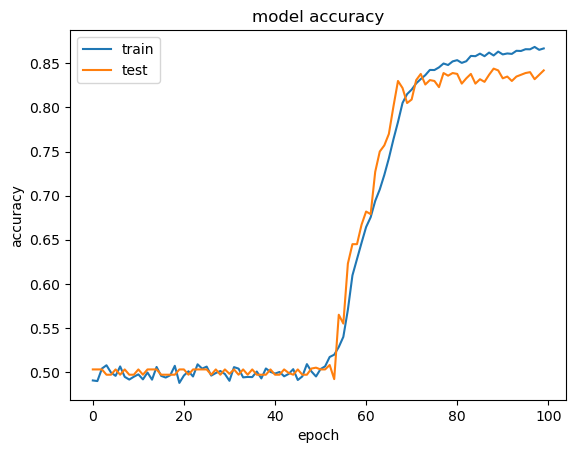

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')


In [75]:
pred_results = model.predict(([inputs_test,queries_test]))

32/32 [==============================] - 1s 10ms/step


In [76]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [77]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [78]:
pred_results.shape

(1000, 38)

In [79]:
pred_results[0]

array([7.7195622e-08, 6.4556964e-08, 7.6737017e-08, 5.9817360e-08,
       6.4765018e-08, 7.0109074e-08, 5.9831279e-08, 6.5927743e-08,
       8.1496736e-08, 6.0306292e-08, 6.6594659e-08, 7.2077995e-08,
       6.9623212e-08, 7.0189351e-08, 8.2078607e-08, 7.1342008e-08,
       6.4535172e-08, 7.0963644e-08, 6.5560826e-08, 5.9787823e-08,
       9.8639435e-01, 6.3889367e-08, 7.4869959e-08, 6.4401632e-08,
       6.5332145e-08, 7.3047488e-08, 7.0928600e-08, 6.8551380e-08,
       6.6154975e-08, 7.1420843e-08, 6.5279323e-08, 7.4170650e-08,
       7.8316518e-08, 6.7584956e-08, 1.3603222e-02, 7.1629159e-08,
       6.0437912e-08, 7.3144385e-08], dtype=float32)

In [80]:
val_max = np.argmax(pred_results[0])

In [81]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [82]:
k

'no'

In [83]:
pred_results[0][val_max] #probability

0.98639435

In [84]:
test_data[0][2]

'no'